In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [4]:
df = pd.read_csv("../../data/sample_triples.csv",encoding='utf-8',escapechar="\\")

In [5]:
df

,subject,relation,object
0,Elon Musk,employer,Tesla
1,Twitter,owned by,CEO
2,CEO,owner of,Twitter
3,Tesla,headquarters location,Austin
4,Derek Windham,employer,Hewlett Packard Enterprise Co
5,Tesla Model 3,country,U.S.
6,Derek Windham,country,U.S.
7,"Westminster, California",country,U.S.


In [24]:
G=nx.from_pandas_edgelist(df, "subject", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [35]:
edge_labels = dict([((x,y),z) for x,y,z in zip(df.subject, df.object,df.relation)])


In [36]:
edge_labels

{('Elon Musk', 'Tesla'): 'employer',
 ('Twitter', 'CEO'): 'owned by',
 ('CEO', 'Twitter'): 'owner of',
 ('Tesla', 'Austin'): 'headquarters location',
 ('Derek Windham', 'Hewlett Packard Enterprise Co'): 'employer',
 ('Tesla Model 3', 'U.S.'): 'country',
 ('Derek Windham', 'U.S.'): 'country',
 ('Westminster, California', 'U.S.'): 'country'}

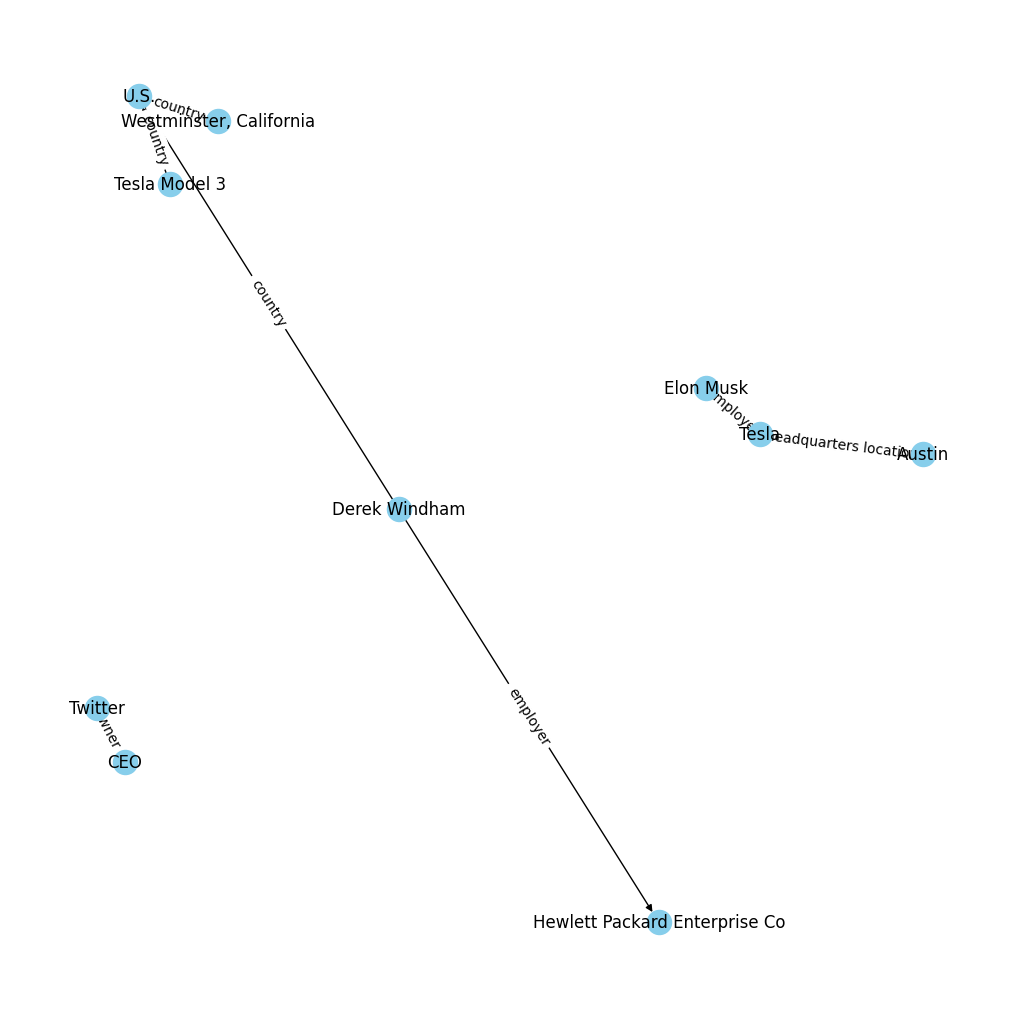

In [38]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=edge_labels )
plt.show()

In [39]:
### Neo4j Visualization

In [ ]:
#!pip install py2neo
#!pip install pandas

In [ ]:
from py2neo import Graph, Node, Relationship
import pandas as pd 

In [ ]:
#give the ip address and port on which neo4j is running # auth =(user name,password),
graph = Graph("bolt://localhost:7687", auth=("neo4j", "password")) 
graph.delete_all()
df = pd.read_csv("../../data/sample_triples.csv",encoding='utf-8',escapechar="\\")
df = df.dropna()
# The header of the csv file must be subject, relation, object 
for index, row in df.iterrows(): 
    tx = graph.begin()
    a = Node('Subject', name = row['subject'], id = row['subject'])
    #graph.create(a) 
    b = Node('Object', name = row['object'], id = row['object'] )
    ab = Relationship(a,row['relation'],b)
    tx.merge(ab,primary_label='id', primary_key='id')
    graph.commit(tx)